In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Dictionary

- GRE Score: GRE Scores ( out of 340 )
- TOEFL Score: TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- SOP: Statement of Purpose Strength ( out of 5 )
- LOR: Letter of Recommendation Strength ( out of 5 )
- CGPA: Undergraduate GPA ( out of 10 )
- Research: Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [3]:
current_dir = os.path.abspath(os.getcwd())

dataset_path = os.path.join(current_dir, '..', 'data', 'Admission_Predict_Ver1.1.csv')

In [4]:
df = pd.read_csv(dataset_path)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#remove whitespaces from the column names. Especially 'Chance of Admit'
df.columns = df.columns.str.strip()

In [7]:
#drop serial number column
df.drop('Serial No.', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
print('There are {} columns and {} rows in the dataset'.format(df.shape[1], df.shape[0]))

There are 8 columns and 500 rows in the dataset


**No missing values**

In [11]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Correlation among variables**

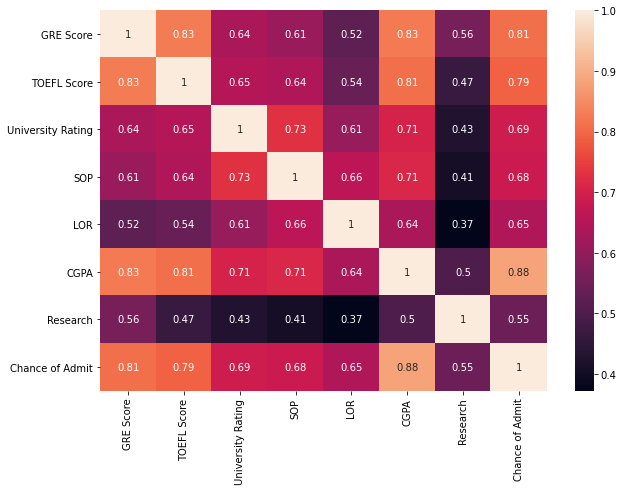

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True) 

The heatmap shows the feature - target and feature - feature correlation. 

From the heatmap above, we can see that;
- All the features are positively correlated with Chance of admit but CGPA and GRE Score show the strongest correlation
- GRE Score is also strongly correlated with CGPA and TOEFL Score

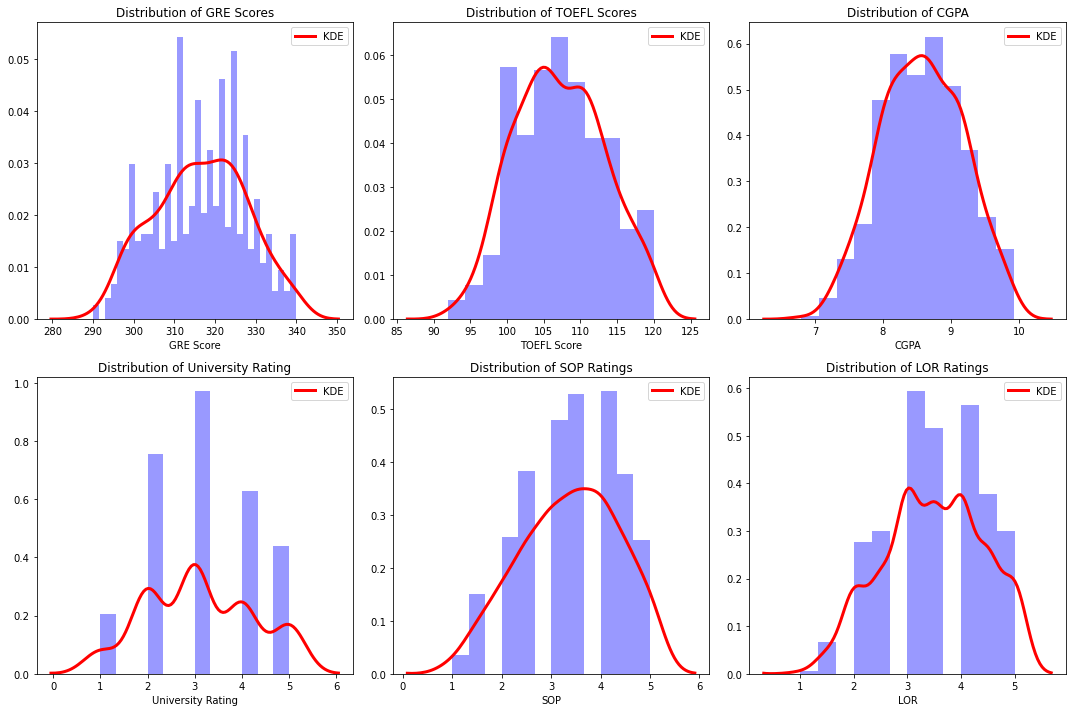

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.distplot(df['GRE Score'], bins=34,color='Blue',  kde_kws={"color": "r", "lw": 3, "label": "KDE"}, 
             hist_kws={"lw": 2,"alpha": 0.4})
plt.title("Distribution of GRE Scores")
plt.subplot(2, 3, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='Blue', kde_kws={"color": "r", "lw": 3, "label": "KDE"}, 
             hist_kws={"alpha": 0.4})
plt.title("Distribution of TOEFL Scores")
plt.subplot(2, 3, 3)
sns.distplot(df['CGPA'],bins=12,color='Blue', kde_kws={"color": "r", "lw": 3, "label": "KDE"}, 
             hist_kws={"alpha": 0.4})
plt.title("Distribution of CGPA")
plt.subplot(2, 3, 4)
sns.distplot(df['University Rating'],bins=12,color='Blue', kde_kws={"color": "r", "lw": 3, "label": "KDE"},
             hist_kws={"alpha": 0.4})
plt.title("Distribution of University Rating")
plt.subplot(2, 3, 5)
sns.distplot(df['SOP'],bins=12,color='Blue', kde_kws={"color": "r", "lw": 3, "label": "KDE"}, 
             hist_kws={"alpha": 0.4})
plt.title("Distribution of SOP Ratings")
plt.subplot(2, 3, 6)
sns.distplot(df['LOR'],bins=12,color='Blue', kde_kws={"color": "r", "lw": 3, "label": "KDE"},
             hist_kws={"alpha": 0.4})
plt.title("Distribution of LOR Ratings")
plt.tight_layout()

***People tend to score above 310 in GRE and above 100 in TOEFL and most people had CGPA between 8 and 9*** 

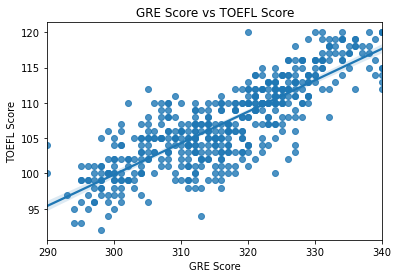

In [14]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

Students with higher GRE Scores also have higher TOEFL Scores which makes sense because most people prepare for both exams hand in hand, so hardworking and smart students tend to do extremely well. 

**How important is CGPA**

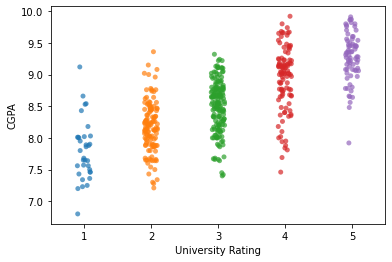

In [15]:
sns.stripplot(x='University Rating', y='CGPA', data=df, alpha=0.7, jitter=True)

Student CGPA increases as university rating increases.

This could mean that students with higher CGPAs applied to schools with higher ratings.

If you check other features like TOEFL, GRE, Research ..; they also increase with university rating.

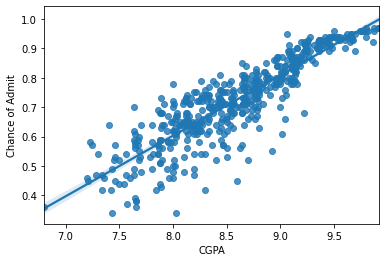

In [16]:
sns.regplot(x='CGPA', y='Chance of Admit', data=df)

Chance of admit increases considerably as CGPA increases

**How important is Research?**

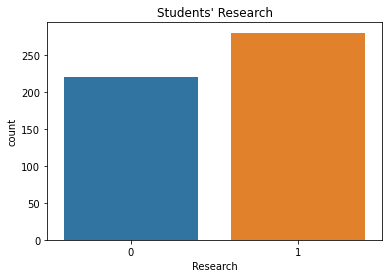

500 students in total
280 of them did research


In [17]:
sns.countplot('Research', data=df)
plt.title("Students' Research")
plt.show()

print('{} students in total'.format(df.shape[0]))
print('{} of them did research'.format(len(df[df['Research']==1])))

**- More than half of the students did research, what separates the students that did research from those that did not?**

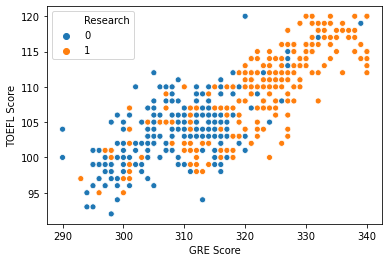

In [18]:
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score', hue='Research')

The scatterplot above shows that the students that did research had really good GRE and TOEFL scores.

High performing students are more likely to have done research.

**- Does research increase chance of admit??**

Yes it does

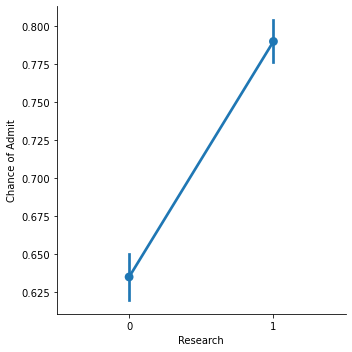

In [19]:
sns.factorplot(x='Research', y='Chance of Admit', data=df)
plt.show()

**Most of the universities in the dataset had a rating of 3.0, why are universities with this rating extremely popular?**

Looking for more than 80% chance of addmission?

What should your scores look like?

In [20]:
eighty = df[df['Chance of Admit'] > 0.80]
eighty.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
22,328,116,5,5.0,5.0,9.50,1,0.94
23,334,119,5,5.0,4.5,9.70,1,0.95
24,336,119,5,4.0,3.5,9.80,1,0.97
25,340,120,5,4.5,4.5,9.60,1,0.94
32,338,118,4,3.0,4.5,9.40,1,0.91
33,340,114,5,4.0,4.0,9.60,1,0.90
34,331,112,5,4.0,5.0,9.80,1,0.94


In [21]:
print('{}% of the students had more than 80% chance of get admitted into the university'.format(len(eighty)/ len(df) * 100))

28.4% of the students had more than 80% chance of get admitted into the university


### Conclusion

From the correlation heatmap and other visualizations, we see that most - if not all - of the features in the data are important determinants in predicting the chance of admission, although it seems GRE and TOEFL are the biggest players.

To be sure of exactly how important these features are, we'll go ahead and use Machine Learning techniques to check.


Overall, high performing students with really high GRE, TOEFL, CGPA who have research experience have higher chance of admission into universities with high ratings.